In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [100]:
df = pd.read_csv(r'C:\Users\Enrico.bisordi\OneDrive - Rio Bravo\Desktop\Nova pasta\pnadc2015V.csv')

In [4]:
df.head(3)

,Ano,Trimestre,UF,UPA,Estrato,V1008,V1014,V1030,V1031,V1032,...,V1032197,V1032198,V1032199,V1032200,ID_DOMICILIO,CO1,CO1e,CO2,CO2e,CO3
0,2015,2,Rondônia,110000016,1110011,1,4,488676,123.460822,157.005749,...,339.635481,0.0,149.043646,158.522347,1100000160104,1.00602,1.015296,1.521805,1.535838,1.512699
1,2015,2,Rondônia,110000016,1110011,1,4,488676,123.460822,157.005749,...,339.635481,0.0,149.043646,158.522347,1100000160104,1.00602,1.015296,1.521805,1.535838,1.512699
2,2015,2,Rondônia,110000016,1110011,2,4,488676,123.460822,148.861998,...,313.380456,0.0,144.019606,147.073616,1100000160204,1.00602,1.015296,1.521805,1.535838,1.512699


Parte específica para a extração dos metadados

In [101]:
df_metadados = pd.read_excel(r"C:\Users\Enrico.bisordi\OneDrive - Rio Bravo\Downloads\Dicionário de variáveis PNAD.xls",skiprows=3)

In [102]:
df_metadados.columns

Index(['Parte 1 - Identificação e Controle', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

Tratamento sobre os metadados

In [103]:
df_metadados2 = df_metadados.iloc[:,[2,4,5,6]]

In [104]:
df_metadados.head(3)

,Parte 1 - Identificação e Controle,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,4.0,Ano,NaN,Ano de referência,NaN,NaN,1º tri/2019 - 4º tri/2019,x
1,5,1.0,Trimestre,NaN,Trimestre de referência,1 a 4,Número do trimestre (1 a 4),1º tri/2019 - 4º tri/2019,x
2,6,2.0,UF,NaN,Unidade da Federação,11,Rondônia,1º tri/2019 - 4º tri/2019,x


In [105]:
df_metadados3 = df_metadados2.rename(columns={"Unnamed: 2":"codigo_da_variavel","Unnamed: 4":"descricao","Unnamed: 5":"tipo","Unnamed: 6":"descricao_tipo"})

In [10]:
df_metadados3.head(3)

,codigo_da_variavel,descricao,tipo,descricao_tipo
0,Ano,Ano de referência,NaN,NaN
1,Trimestre,Trimestre de referência,1 a 4,Número do trimestre (1 a 4)
2,UF,Unidade da Federação,11,Rondônia


Extração das colunas desejadas para o estudo

In [123]:
df_metadados4 = df_metadados3[df_metadados3["codigo_da_variavel"].isin(["UF","V2007","V2009","V2010","VD3005","V5004A2","V403312"])]

In [124]:
df_metadados4.head(3)

,codigo_da_variavel,descricao,tipo,descricao_tipo
2,UF,Unidade da Federação,11,Rondônia
115,V2007,Sexo,1,Homem
123,V2009,Idade do morador na data de referência,0 a 130,Idade (em anos)


Parte específica para renomear as colunas do dataframe inicial a partir da df_metadados4

In [153]:
# Separação das variáveis
filtro_colunas = df_metadados4["codigo_da_variavel"].unique()

# Filtro sobre o dataframe inicial
df_2 = df[filtro_colunas]

In [154]:
# Dicionário com os nomes das colunas a renomar a partir do df_metadados4
dicionario = dict(zip(df_metadados4["codigo_da_variavel"],df_metadados4["descricao"]))

In [155]:
dicionario_2 = {"UF":"uf","V2007":"sexo","V2009":"idade","V2010":"cor","VD3005":"anos_de_estudo","V5004A2":"valor_benef_pensao_previdencia","V403312":"rendimento_bruto"}

In [156]:
# Tabela Após os filtros
df_3 = df_2.rename(columns=dicionario_2)

In [157]:
df_3.head(3)

,uf,sexo,idade,cor,rendimento_bruto,valor_benef_pensao_previdencia,anos_de_estudo
0,Rondônia,Feminino,38,Parda,1000.0,NaN,12 anos de estudo
1,Rondônia,Masculino,24,Parda,740.0,NaN,12 anos de estudo
2,Rondônia,Feminino,22,Branca,740.0,NaN,8 anos de estudo


In [158]:
# Remoção de duplicadas - valor é alto de duplicadas por conta da quantidade pequena de colunas sobre a qual foi feito o filtro
df_4 = df_3.drop_duplicates()

In [159]:
df_4 = df_4[df_4["cor"] != "Ignorado"]

In [160]:
df_4["anos_de_estudo"] = df_4["anos_de_estudo"].astype(str)

# Aspectos gerais dos dados

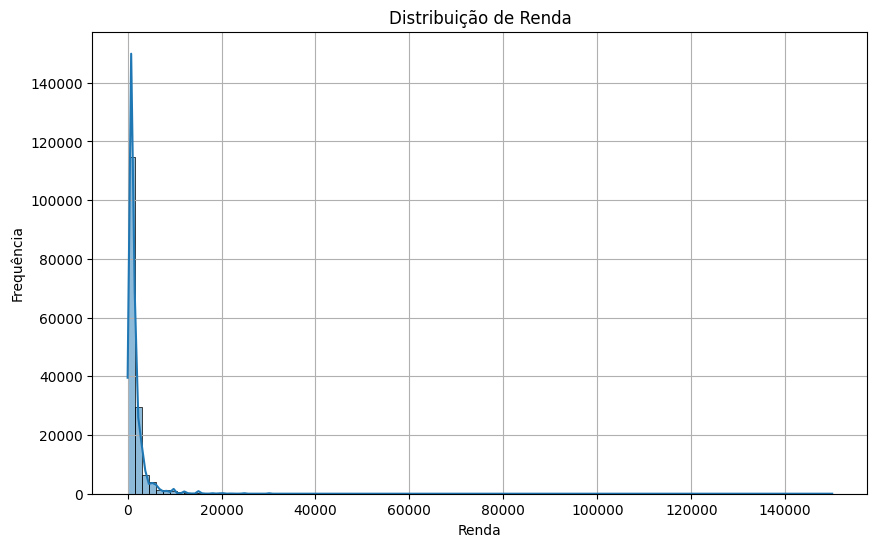

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(df_4['rendimento_bruto'],kde=True, bins = 100 )
plt.title('Distribuição de Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [162]:
# Presença de Outlier sobre a variável rendimento_bruto

df_4['rendimento_bruto'].max()

np.float64(150000.0)

In [163]:
df_5 = df_4[df_4['rendimento_bruto'] <= 40000]

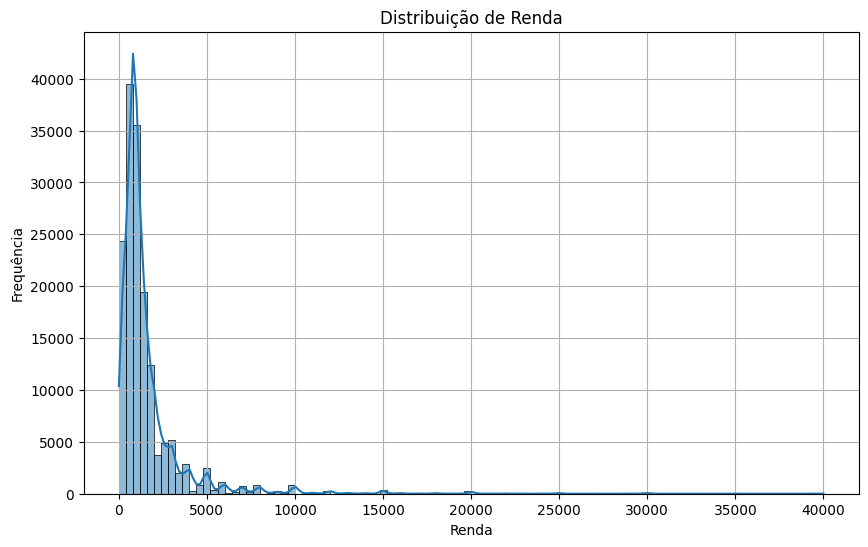

In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(df_5['rendimento_bruto'],kde=True, bins = 100 )
plt.title('Distribuição de Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

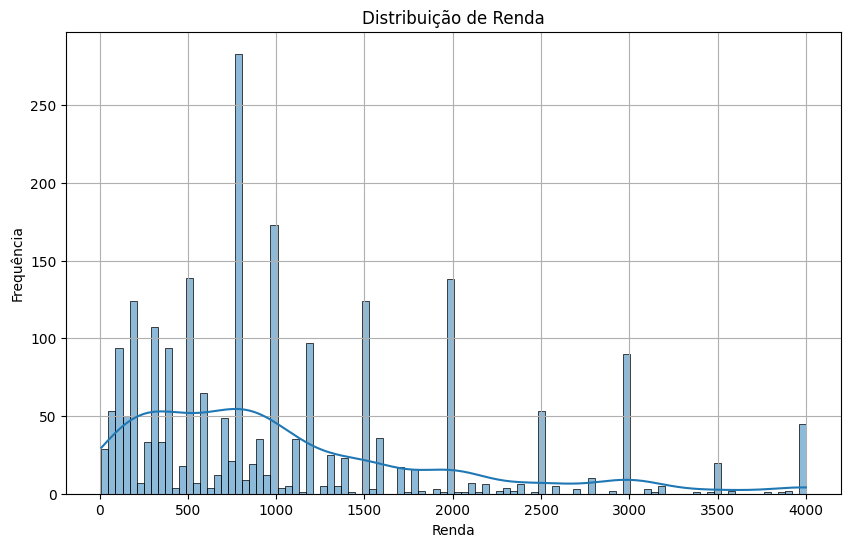

In [165]:
plt.figure(figsize=(10, 6))
sns.histplot(df_6['rendimento_bruto'],kde=True, bins = 100 )
plt.title('Distribuição de Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [167]:
contagem_renda = df_4['rendimento_bruto'].value_counts()

moda_renda = contagem_renda.idxmax()

print(moda_renda)

788.0


In [169]:
df_4.dropna(inplace = True)

In [171]:
len(df_4[df_4['rendimento_bruto'] <= 40000])/len(df_4)*100

99.91941982272361

In [170]:
df_6 = df_4[df_4['rendimento_bruto'] <= 4000]
len(df_4[df_4['rendimento_bruto'] <= 4000])/ len(df_4)*100

92.34488315874295

In [172]:
df_4["rendimento_bruto"] =  df_4["rendimento_bruto"].fillna(0)
df_5["valor_benef_pensao_previdencia"] = df_5["valor_benef_pensao_previdencia"].fillna(0)

In [173]:
df_5["renda_total"] = df_5["rendimento_bruto"] + df_5["valor_benef_pensao_previdencia"]

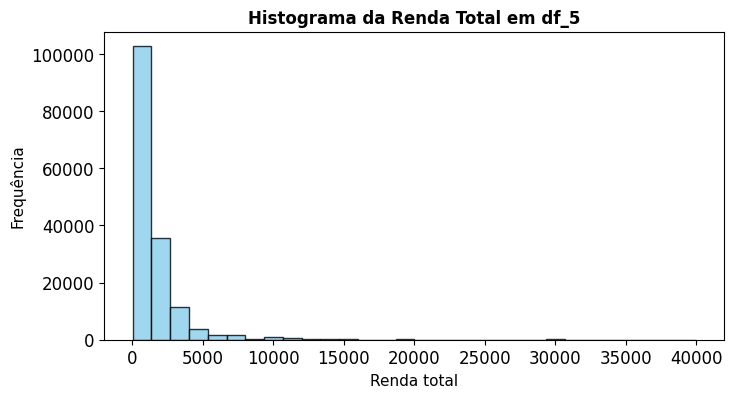

In [174]:
plt.figure(figsize=(8, 4))
plt.hist(df_5['renda_total'], bins=30, color='skyblue', edgecolor='black', alpha=0.8)

plt.title('Histograma da Renda Total em df_5', fontsize=12, weight='bold')
plt.xlabel('Renda total', fontsize=11)
plt.ylabel('Frequência', fontsize=11)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

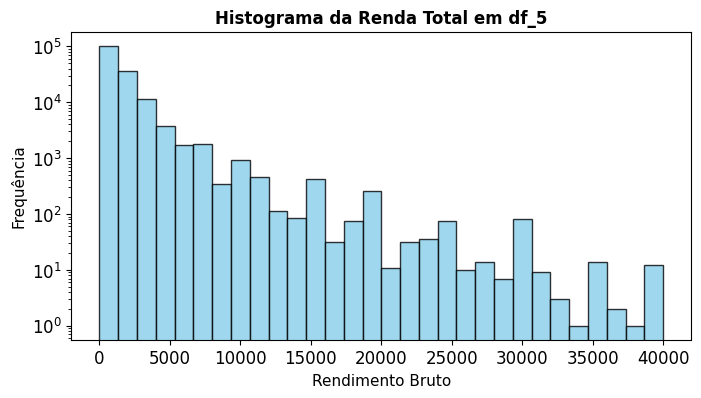

In [175]:
plt.figure(figsize=(8, 4))
plt.hist(df_5['renda_total'], bins=30, color='skyblue', edgecolor='black', alpha=0.8, log = True)

plt.title('Histograma da Renda Total em df_5', fontsize=12, weight='bold')
plt.xlabel('Rendimento Bruto', fontsize=11)
plt.ylabel('Frequência', fontsize=11)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [176]:
df_5 = df_5[df_5["idade"] <= 80]

In [177]:
# extração dos anos de estudo

def extrair_anos_de_estudo(entrada):
    padrao = re.compile(r"(\d{1,2}) anos de estudo")
    extrair = padrao.search(entrada)
    if extrair:
        return extrair.group(1)
    return 0

In [178]:
df_5["anos_de_estudo"] = df_5["anos_de_estudo"].apply(extrair_anos_de_estudo)

In [179]:
df_5 = df_5.replace([np.inf, -np.inf], 0)

In [180]:
df_5["anos_de_estudo"] = df_5["anos_de_estudo"].astype(int)

In [181]:
 df_5['cor'].value_counts()

cor
Parda       78283
Branca      65709
Preta       14558
Amarela       662
Indígena      458
Name: count, dtype: int64

Contando o número de pessoas na amostra, notamos uma discrepância muito grande entre as outras cores e Amarelos/Indígenas. Vamos removê-los da amostra antes de realizar nosso estudo. 

In [182]:
df_5 = df_5[~df_5['cor'].isin(['Amarela', 'Indígena'])]

# Análise por subgrupo

<Axes: xlabel='idade'>

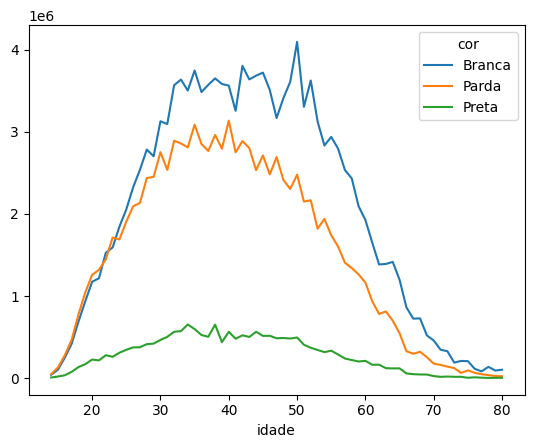

In [183]:
df_5.pivot_table('rendimento_bruto', index = 'idade',columns = 'cor', aggfunc = sum).plot()

<Axes: xlabel='idade'>

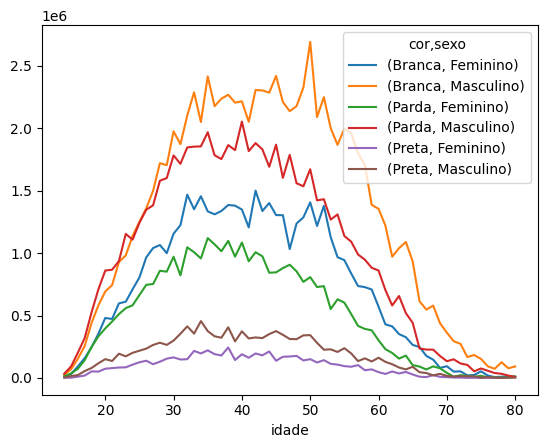

In [184]:
df_5.pivot_table('rendimento_bruto', index='idade', columns=['cor', 'sexo'], aggfunc=sum).plot()

# Renda média por idade e cor/sexo

In [185]:
media_rendimentos = df_5.groupby('sexo')['rendimento_bruto'].mean().round(2)
print(media_rendimentos)

sexo
Feminino     1391.51
Masculino    1765.46
Name: rendimento_bruto, dtype: float64


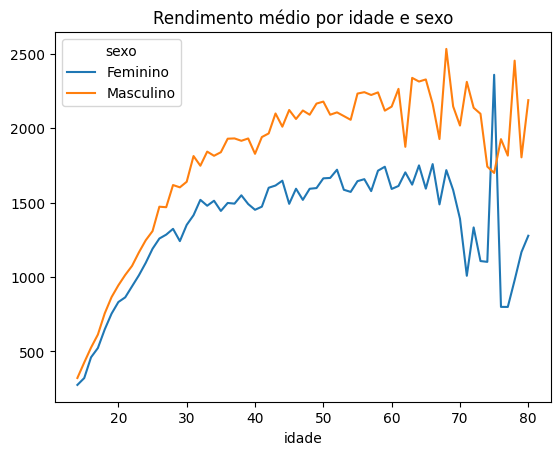

In [186]:
total_redimentos = df_5.pivot_table('renda_total',index='idade',columns='sexo',aggfunc='mean',fill_value=0).plot(title='Rendimento médio por idade e sexo')

In [187]:
df_5_temp = df_5[(df_5['idade'] >= 60) & (df_5['idade'] <= 80)] 

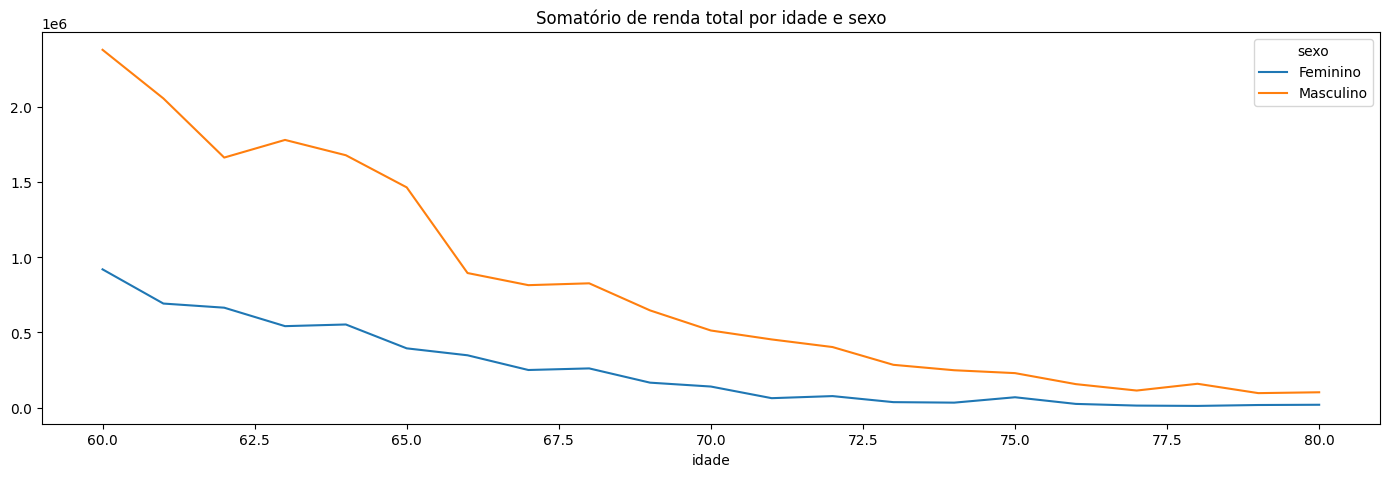

In [188]:
fig, ax = plt.subplots(figsize=(14, 5))

pivot_table = df_5_temp.pivot_table('rendimento_bruto', index='idade', columns='sexo', aggfunc='sum', fill_value=0)
pivot_table.plot(ax=ax, title='Somatório de renda total por idade e sexo')

plt.tight_layout()

plt.suptitle('')
plt.subplots_adjust(top=0.9)

plt.show()

In [189]:
df_5_temp_2 = df_5[~ df_5['cor'].isin(["Amarela","Indígena"])] 

<Axes: title={'center': 'Rendimento médio por idade e cor'}, xlabel='idade'>

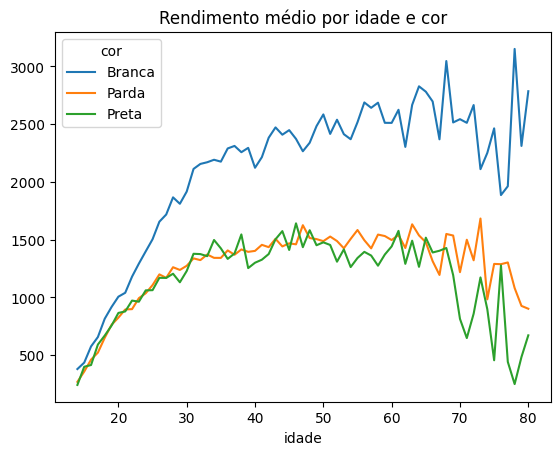

In [190]:
df_5_temp_2.pivot_table('renda_total',index='idade',columns='cor',aggfunc='mean',fill_value=0).plot(title='Rendimento médio por idade e cor')

# Visualização de dados por estado

In [191]:
df_5["regiao"] = df_5["uf"].apply(lambda x: "Sudeste" if x in ["São Paulo","Rio de Janeiro","Minas Gerais","Espírito Santo"] else "Sul" if x in ["Paraná","Santa Catarina","Rio Grande do Sul"] else "Centro-Oeste" if x in ["Mato Grosso","Mato Grosso do Sul","Goiás","Distrito Federal"] else "Nordeste" if x in ["Bahia","Sergipe","Alagoas","Pernambuco","Paraíba","Rio Grande do Norte","Ceará","Piauí","Maranhão"] else "Norte")

In [192]:
total_estado = df_5.pivot_table('rendimento_bruto',index='idade',columns='regiao',aggfunc='sum',fill_value=0)

In [193]:
total_estado

regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
idade,,,,,
14,13952.0,25669.0,16359.0,17138.0,17289.0
15,28136.0,57744.0,32717.0,59109.0,69722.0
16,87041.0,109241.0,62786.0,129733.0,169110.0
17,142303.0,194377.0,108000.0,250303.0,259998.0
18,228076.0,338856.0,222549.0,390114.0,415408.0
...,...,...,...,...,...
76,11628.0,33599.0,30188.0,76632.0,30536.0
77,14420.0,22401.0,12168.0,67078.0,12765.0
78,22214.0,41750.0,2000.0,80064.0,25608.0


In [194]:
filtro = total_estado[["Sudeste","Sul","Centro-Oeste","Nordeste","Norte"]]

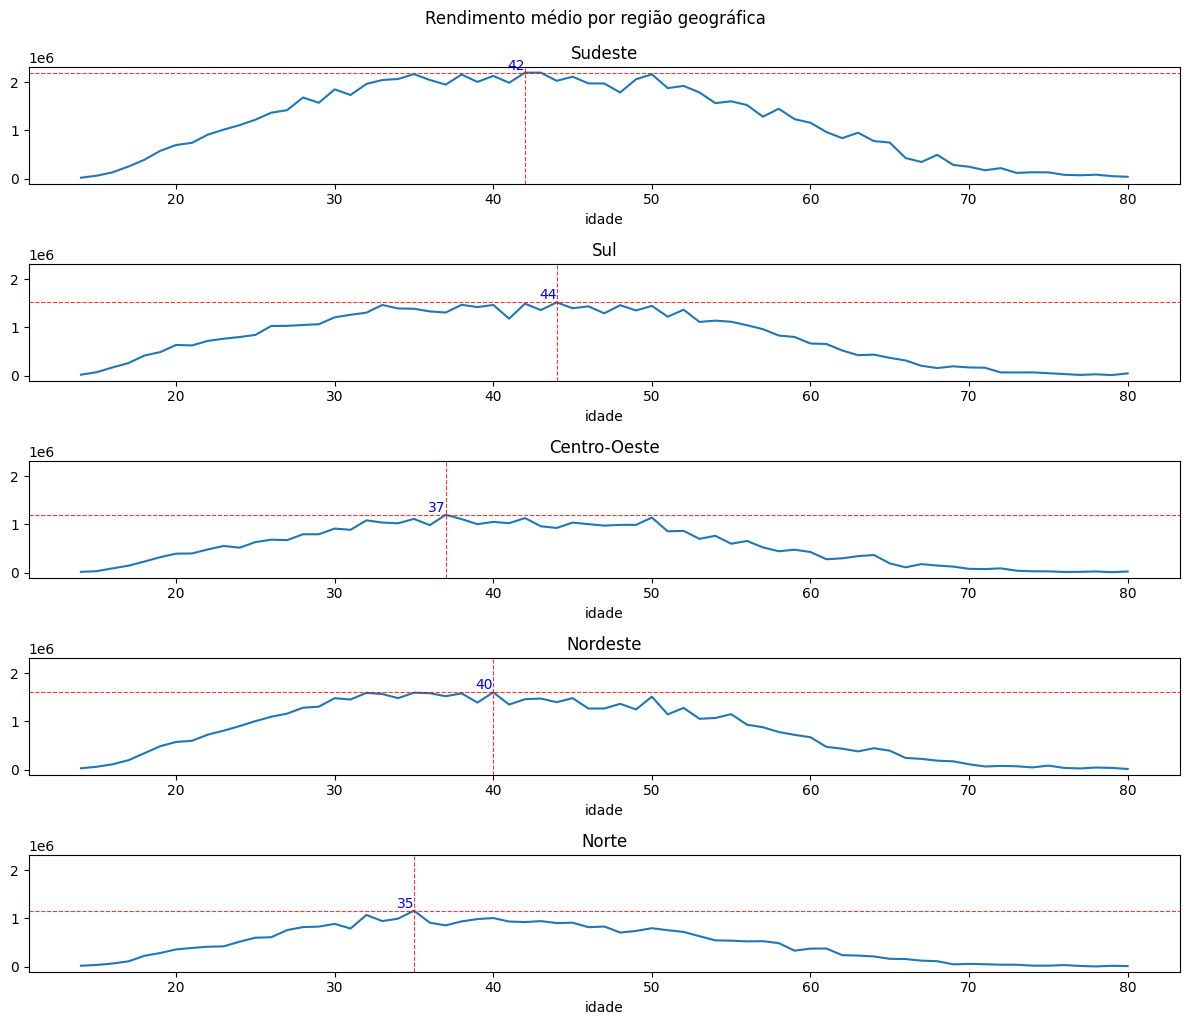

In [195]:
fig, ax = plt.subplots(nrows=len(filtro.columns), ncols=1, figsize=(12, 10), sharey=True)

for i, col in enumerate(filtro.columns):
    filtro[col].plot(ax=ax[i], title=col)
    
    max_value_y = filtro[col].max()
    ax[i].axhline(y=max_value_y, color='r', linestyle='--',linewidth=0.8, alpha=0.8)
    
    max_value_x = filtro[col].idxmax()
    ax[i].axvline(x=max_value_x, color='r', linestyle='--',linewidth=0.8, alpha=0.8)
    
    ax[i].text(max_value_x, max_value_y, f'{max_value_x}', color='b', ha='right', va='bottom')

plt.tight_layout()
plt.suptitle('Rendimento médio por região geográfica', y=1.02)
plt.show()

# Anos de Estudo

In [196]:
df_5

,uf,sexo,idade,cor,rendimento_bruto,valor_benef_pensao_previdencia,anos_de_estudo,renda_total,regiao
0,Rondônia,Feminino,38,Parda,1000.0,0.0,12,1000.0,Norte
1,Rondônia,Masculino,24,Parda,740.0,0.0,12,740.0,Norte
2,Rondônia,Feminino,22,Branca,740.0,0.0,8,740.0,Norte
5,Rondônia,Masculino,28,Parda,1500.0,0.0,12,1500.0,Norte
7,Rondônia,Masculino,34,Parda,1500.0,0.0,0,1500.0,Norte
...,...,...,...,...,...,...,...,...,...
459254,Distrito Federal,Feminino,45,Parda,3500.0,0.0,0,3500.0,Centro-Oeste
459260,Distrito Federal,Masculino,30,Parda,1800.0,0.0,5,1800.0,Centro-Oeste
459261,Distrito Federal,Feminino,27,Parda,800.0,0.0,14,800.0,Centro-Oeste
459264,Distrito Federal,Masculino,52,Parda,1000.0,0.0,6,1000.0,Centro-Oeste


# Análise por Unidade Federativa (UF)

In [197]:
dados_agrupados = df_5.pivot_table('rendimento_bruto',index='anos_de_estudo',columns='cor',aggfunc='mean',fill_value=0)

In [198]:
dados_agrupados

cor,Branca,Parda,Preta
anos_de_estudo,,,
0,3814.801918,2005.459318,1853.990841
2,911.681223,690.785797,694.536082
3,920.717703,711.284199,758.876993
4,1046.657822,819.673382,825.769643
5,1324.104322,943.549022,953.765306
6,1323.924505,936.491556,943.715203
7,1273.859000,947.187943,977.944867
8,1299.709472,967.882284,968.964706
9,1426.573009,1091.927551,1107.430643


In [199]:
x = dados_agrupados.index.values

In [200]:
y_2 = dados_agrupados["Branca"].values
y_4 = dados_agrupados["Parda"].values
y_5 = dados_agrupados["Preta"].values

In [201]:
y = np.vstack([y_2,y_4,y_5])

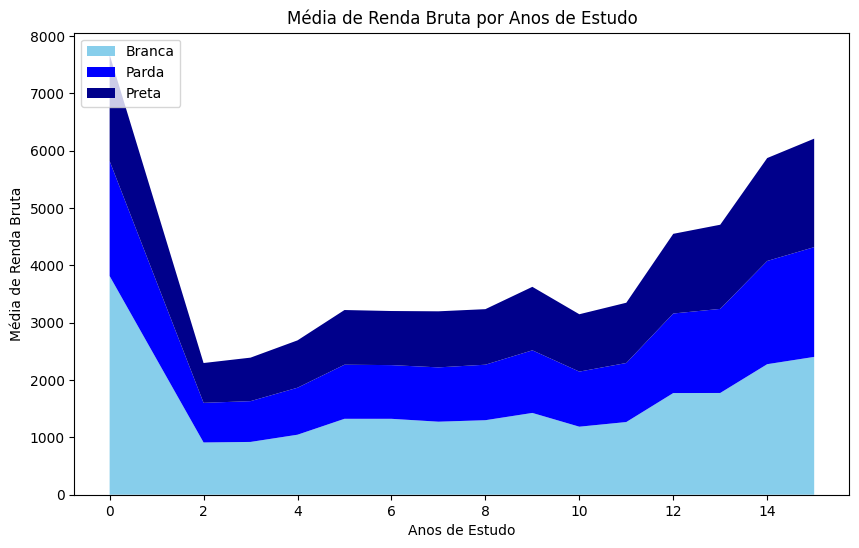

In [202]:
plt.figure(figsize=(10, 6)) 
plt.stackplot(x, y, labels=['Branca','Parda','Preta'], colors = ['skyblue','blue','darkblue'])
plt.title('Média de Renda Bruta por Anos de Estudo')
plt.xlabel('Anos de Estudo')
plt.ylabel('Média de Renda Bruta')
plt.legend(loc='upper left')

plt.show()

# Proporção de renda entre homens e mulheres ao longo das idades

In [206]:
agrup_renda_mensal = df_5.groupby('idade')['rendimento_bruto'].sum().round(2)

In [207]:
agrup_beneficio = df_5.groupby('idade')['valor_benef_pensao_previdencia'].sum().round(2)    

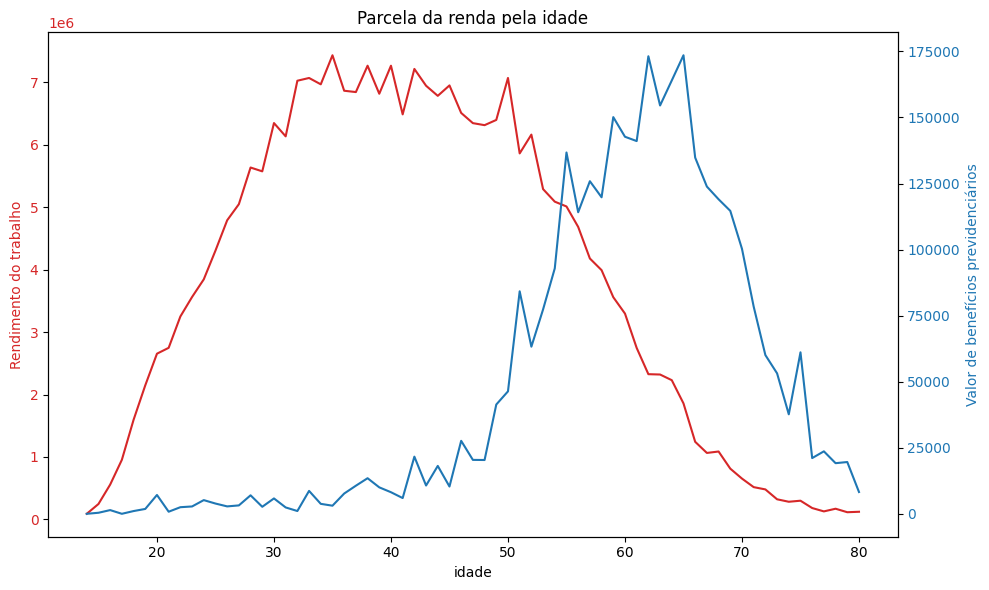

In [208]:
fig,ax = plt.subplots(figsize=(10,6))

color = 'tab:red'
ax.set_xlabel('idade')
ax.set_ylabel('Rendimento do trabalho',color=color)
ax.plot(agrup_renda_mensal.index, agrup_renda_mensal.values,color=color)
ax.tick_params(axis='y',labelcolor=color)

ax2 = ax.twinx()
color = 'tab:blue'
ax2.set_ylabel('Valor de benefícios previdenciários',color=color)
ax2.plot(agrup_beneficio.index,agrup_beneficio.values,color=color)
ax2.tick_params(axis='y',labelcolor=color)  

plt.title("Parcela da renda pela idade")
fig.tight_layout()
plt.show()